In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [10]:
# Converting Target  Numerical Variable in Categorical Variable

def split(num):
    if num <5:
        return 'Low Sale'
    elif num > 5 and num <10:
        return 'Medium Sale'
    else:
        return 'High Sale'

In [11]:
df.Sales = df.Sales.apply(split)

In [14]:
df['Sales'].head()

0    Medium Sale
1      High Sale
2      High Sale
3    Medium Sale
4       Low Sale
Name: Sales, dtype: object

<AxesSubplot:>

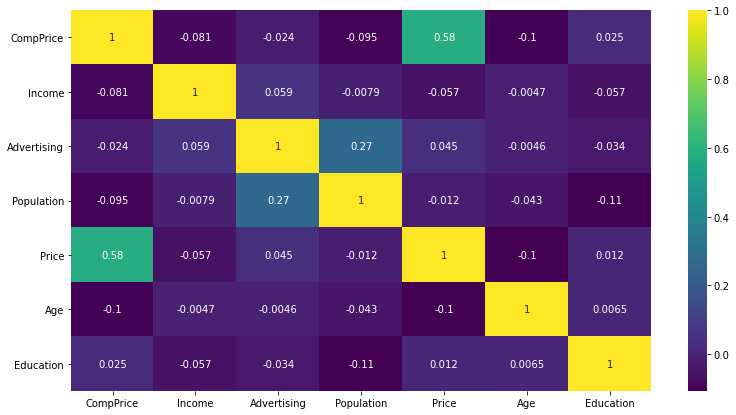

In [16]:
corr = df.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr,xticklabels=True, yticklabels=True, annot=True,cmap='viridis')

In [17]:
df['Sales'].value_counts()

Medium Sale    244
High Sale       79
Low Sale        77
Name: Sales, dtype: int64

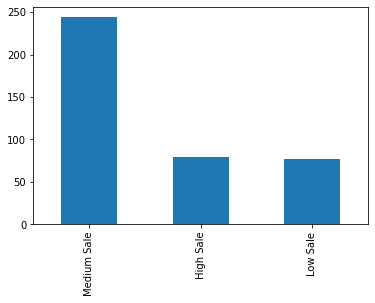

In [26]:
df['Sales'].value_counts(sort=True).plot.bar()
plt.show()

Yes    282
No     118
Name: Urban, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

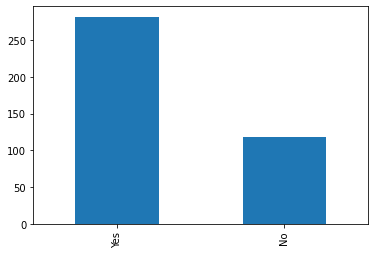

In [31]:
print(df['Urban'].value_counts())
df['Urban'].value_counts(sort=True).plot.bar()
plt.show

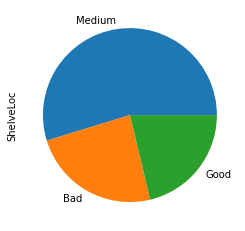

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [32]:
df['ShelveLoc'].value_counts(sort=True).plot.pie()
plt.show()
print(df['ShelveLoc'].value_counts())

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
df1= df[['ShelveLoc', 'Urban','US']].apply(le.fit_transform)

In [36]:
df1.head()

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [38]:
df = df.drop(columns={'ShelveLoc', 'Urban', 'US'}, axis=1)

In [40]:
df =pd.concat([df, df1], axis=1, sort=False)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,Medium Sale,138,73,11,276,120,42,17,0,1,1
1,High Sale,111,48,16,260,83,65,10,1,1,1
2,High Sale,113,35,10,269,80,59,12,2,1,1
3,Medium Sale,117,100,4,466,97,55,14,2,1,1
4,Low Sale,141,64,3,340,128,38,13,0,1,0


In [42]:
col_names = list(df.columns)
col_names

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc',
 'Urban',
 'US']

In [66]:
x = df.iloc[:,1:11]
y = df.iloc[: , 0]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

# Decision Tree Model

In [130]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [131]:
pred= model.predict(x_train)

In [132]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,pred)

1.0

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
confusion_matrix(y_train, pred)

array([[ 63,   0,   0],
       [  0,  62,   0],
       [  0,   0, 195]], dtype=int64)

In [135]:
pred_test = model.predict(x_test)

In [136]:
accuracy_score(y_test, pred_test)

0.6125

In [137]:
dff = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
dff

,Actual,Predicted
217,Low Sale,Low Sale
249,Medium Sale,Low Sale
251,Low Sale,Low Sale
178,High Sale,High Sale
147,High Sale,High Sale
...,...,...
188,Medium Sale,Medium Sale
227,Medium Sale,High Sale
221,Medium Sale,Medium Sale
85,Medium Sale,Medium Sale


In [138]:
predictors = col_names[1:11]
target = col_names[0]

In [151]:
from sklearn import externals
from io import StringIO
import pydotplus
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [152]:
dot_data = StringIO()

In [153]:
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,feature_names =predictors,class_names = target, impurity = False )

In [155]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [158]:
model.feature_importances_

array([0.17132565, 0.04965218, 0.03773724, 0.11074898, 0.22075234,
       0.15679546, 0.07743282, 0.16807568, 0.        , 0.00747965])

In [159]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [160]:
fi

,feature,importance
4,Price,0.220752
0,CompPrice,0.171326
7,ShelveLoc,0.168076
5,Age,0.156795
3,Population,0.110749
6,Education,0.077433
1,Income,0.049652
2,Advertising,0.037737
9,US,0.007480
8,Urban,0.000000
